# Modelagem de tópicos
### corpus: teses e dissertações 2012

## Bibliotecas utilizadas

In [1]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

import nltk
from nltk.probability import FreqDist

import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#TRANSFORMAR SIGLAS POPULARES EM PALAVRAS

def conversao_termos(texto):
    texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub(" abc "," academia brasileira de ciência ",texto.lower())
    texto = re.sub(" ai "," arquitetura da informação ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" american society for information science and Technology "," asist ",texto.lower())
    texto = re.sub(" annual review of information science and technology "," arist ",texto.lower())
    texto = re.sub(" aoi "," arquitetura e organização da informação ",texto.lower())
    texto = re.sub(" associação brasileira de educação em ciência da informação "," abecin ",texto.lower())
    texto = re.sub(" associação brasileira de ensino de biblioteconomia e documentação "," abebd ",texto.lower())
    texto = re.sub(" associação brasileira de normas técnicas "," abnt ",texto.lower())
    texto = re.sub(" associação nacional de pesquisa e pós-graduação em ciência da informação "," ancib ",texto.lower())
    texto = re.sub(" base de dados referencial de artigos de periódicos em ciência da informação "," brapci ",texto.lower())
    texto = re.sub(" bci "," biblioteconomia e ciência da informação ",texto.lower())
    texto = re.sub(" biblioteca digital de teses e dissertações "," bdtd ",texto.lower())
    texto = re.sub(" bn "," biblioteca nacional ",texto.lower())
    texto = re.sub(" bu "," biblioteca universitária ",texto.lower())
    texto = re.sub(" c&t "," ciência e tecnologia ",texto.lower())
    texto = re.sub(" cc "," ciência da computação ",texto.lower())
    texto = re.sub(" ccn "," catálogo coletivo nacional ",texto.lower())
    texto = re.sub(" cdd "," classificação decimal de dewey ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" ci "," ciência da informação ",texto.lower())
    texto = re.sub(" ci:"," ciência da informação ",texto.lower()) 
    texto = re.sub(" ci,"," ciência da informação ",texto.lower())
    texto = re.sub(" cms "," content management system ",texto.lower())
    texto = re.sub(" cne "," conselho nacional de educação ",texto.lower())
    texto = re.sub(" conselho nacional de desenvolvimento científico e tecnológico "," cnpq ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" crm "," customer relationship management ",texto.lower())
    texto = re.sub(" dc "," dublin core ",texto.lower())
    texto = re.sub(" descriptive ontology for linguistic and cognitive engineering "," dolce ",texto.lower())
    texto = re.sub(" ead "," educação à distância ",texto.lower())
    texto = re.sub(" eci "," escola de ciência da informação ",texto.lower())
    texto = re.sub(" enade "," exame nacional de desempenho ",texto.lower())
    texto = re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",texto.lower())
    texto = re.sub(" fgv "," Fundação Getúlio Vargas ",texto.lower())
    texto = re.sub(" fiocruz "," fundação oswaldo cruz ",texto.lower())
    texto = re.sub(" ftp "," file transfer protocol ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de minas gerais "," fapemig ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de são paulo "," fapesp ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo do rio de janeiro "," faperj ",texto.lower())
    texto = re.sub(" fundação de amparo às pesquisas "," faps ",texto.lower())
    texto = re.sub(" gic "," gestão da informação e conhecimento ",str(texto.lower()))
    texto = re.sub(" gic "," gestão da informação e do conhecimento ",texto.lower())
    texto = re.sub(" gpl "," general public licence ",texto.lower())
    texto = re.sub(" hypertext markup language limguagem "," html ",texto.lower())
    texto = re.sub(" ia "," inteligência artificial ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ics "," informação cultura e sociedade ",texto.lower())
    texto = re.sub(" ict "," informação, ciência e tecnologia ",texto.lower())
    texto = re.sub(" idh "," índice de desenvolvimento humano ",texto.lower())
    texto = re.sub(" ies "," instituição de ensino superior ",texto.lower())
    texto = re.sub(" information science and technology abstracts "," ista ",texto.lower())
    texto = re.sub(" instituto brasileiro de bibliografia e documentação "," ibbd ",texto.lower())
    texto = re.sub(" instituto brasileiro de geografia e estatística "," ibge ",texto.lower())
    texto = re.sub(" instituto brasileiro de informação em ciência e tecnologia "," ibict ",texto.lower())
    texto = re.sub(" instituto de ciência da informação "," ici ",texto.lower())
    texto = re.sub(" instituto nacional de estudos e pesquisas educacionais anísio teixeira "," inep ",texto.lower())
    texto = re.sub(" instituto universitário de pesquisa do rio de janeiro "," iuoerj ",texto.lower())
    texto = re.sub(" international federation of library associations and institutions "," ifla ",texto.lower())
    texto = re.sub(" international standard book number "," isbn ",texto.lower())
    texto = re.sub(" international standard serial number "," issn ",texto.lower())
    texto = re.sub(" isi "," institute for scientific information ",texto.lower())
    texto = re.sub(" iso "," international organization for standardization ",texto.lower())
    texto = re.sub(" it "," informação e tecnologia ",texto.lower())
    texto = re.sub(" jcr "," journal citation reports ",texto.lower())
    texto = re.sub(" jstor "," journal storage ",texto.lower())
    texto = re.sub(" kos "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" lc "," linguagem cinzenta ",texto.lower())
    texto = re.sub(" ld "," linguagem documentária ",texto.lower())
    texto = re.sub(" ldb "," lei de diretrizes e bases ",texto.lower())
    texto = re.sub(" library and informations science abstracts "," lisa ",texto.lower())
    texto = re.sub(" ln "," linguagem natural ",texto.lower())
    texto = re.sub(" lod "," linked open data ",texto.lower())
    texto = re.sub(" marc "," machine readable cataloging ",texto.lower())
    texto = re.sub(" mdi "," multiple document interface ",texto.lower())
    texto = re.sub(" mec "," ministério da educação ",texto.lower())
    texto = re.sub(" npd "," núcleo de pesquisa e documentação ",texto.lower())
    texto = re.sub(" oai "," open archives iniciative ",texto.lower())
    texto = re.sub(" oc "," organização do conhecimento ",texto.lower())
    texto = re.sub(" ocr "," optical character recognition ",texto.lower())
    texto = re.sub(" oi "," organização da informação ",texto.lower())
    texto = re.sub(" ojs "," open journal systems ",texto.lower())
    texto = re.sub(" ong "," organização não-governamental ",texto.lower())
    texto = re.sub(" onu "," organização das nações unidas ",texto.lower())
    texto = re.sub(" organização das nações unidas para a educação e cultura "," unesco ",texto.lower())
    texto = re.sub(" osi "," open society institute ",texto.lower())
    texto = re.sub(" oui "," organização e uso da informação ",texto.lower())
    texto = re.sub(" owl "," web ontology language ",texto.lower())
    texto = re.sub(" pln "," processamento de linguagem natural ",texto.lower())
    texto = re.sub(" plos "," public library of science ",texto.lower())
    texto = re.sub(" poi "," produção e organização da informação ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de minas gerais "," puc mg ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de são paulo "," puc sp ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio de janeiro "," puc rj ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio grande do sul "," puc rs ",texto.lower())
    texto = re.sub(" ppg "," programa de pós-graduação ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciência da informação "," ppgci ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciências sociais "," ppgcs ",texto.lower())
    texto = re.sub(" programa de pós-graduação em sociologia "," ppgs ",texto.lower())
    texto = re.sub(" rc "," representação do conhecimento ",texto.lower())
    texto = re.sub(" rdf "," resource description framework ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" sad "," sistema de apoio à decisão ",texto.lower())
    texto = re.sub(" sci "," science citation index ",texto.lower())
    texto = re.sub(" scientific electronic library online "," scielo",texto.lower())
    texto = re.sub(" sdr "," zona de desenvolvimento real ",texto.lower())
    texto = re.sub(" serviço central de informação bibliográfica "," scib ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem comercial "," senac ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem industrial "," senai ",texto.lower())
    texto = re.sub(" serviço social da indústria "," sesi ",texto.lower())
    texto = re.sub(" serviço social do comércio "," sesc ",texto.lower())
    texto = re.sub(" sesi "," serviço social da indústria ",texto.lower())
    texto = re.sub(" sibi "," sistema integrado de bibliotecas ",texto.lower())
    texto = re.sub(" sig "," sistema de informação gerencial ",texto.lower())
    texto = re.sub(" snad "," secretária nacional de políticas anti-drogas ",texto.lower())
    texto = re.sub(" snpq "," sistema nacional de pós-graduação",texto.lower())
    texto = re.sub(" soc "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" sri "," sistema de recuperação da informação ",texto.lower())
    texto = re.sub(" ssd "," sistema de suporte à decisão ",texto.lower())
    texto = re.sub(" tcc "," trabalho de conclusão de curso ",texto.lower())
    texto = re.sub(" universidade federal de minas gerais "," ufmg ",texto.lower())
    texto = re.sub(" universidade federal de ouro preto "," ufop ",texto.lower())
    texto = re.sub(" universidade federal de pernambuco "," ufpe ",texto.lower())
    texto = re.sub(" universidade federal de santa caratina "," ufsc ",texto.lower())
    texto = re.sub(" universidade federal de são carlos "," ufscar ",texto.lower())
    texto = re.sub(" universidade federal de sergipe "," ufs ",texto.lower())
    texto = re.sub(" universidade federal de viçosa "," ufv ",texto.lower())
    texto = re.sub(" universidade federal do ceará "," ufc ",texto.lower())
    texto = re.sub(" universidade federal do estado do rio de janeiro "," unirio ",texto.lower())
    texto = re.sub(" universidade federal do maranhão "," ufma ",texto.lower())
    texto = re.sub(" universidade federal do pará "," ufpa ",texto.lower())
    texto = re.sub(" universidade federal do paraná "," ufpr ",texto.lower())
    texto = re.sub(" universidade federal do rio de janeiro "," ufrj ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do norte "," ufrn ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do sul  "," ufrgs ",texto.lower())
    texto = re.sub(" universidade federal fluminense "," uff ",texto.lower())
    texto = re.sub(" universidade federal rural do rio de janeiro "," ufrrj ",texto.lower())
    texto = re.sub(" uri "," uniform resource identifier ",texto.lower())
    texto = re.sub(" world wide web consortium "," w3c ",texto.lower())
    texto = re.sub(" xml "," extensible markup language ",texto.lower())
    texto = re.sub(" zpd "," zona de desenvolvimento proximal ",texto.lower())
    texto = re.sub(" citações "," citação ",texto.lower())
    texto = re.sub(" links "," link ",texto.lower())
   #texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub("museus","museu",texto.lower())
    texto = re.sub(" literacy "," alfabetização ",texto.lower())  
    texto = re.sub(" bibliotecas "," biblioteca ",texto.lower())
    texto = re.sub(" informações "," informação ",texto.lower())
    texto = re.sub(" information "," informação ",texto.lower())
    texto = re.sub(" bibliographia "," bibliografia ",texto.lower())
    texto = re.sub(" termos "," termo ",texto.lower())
    texto = re.sub(" knowledge "," conhecimento ",texto.lower())  
    texto = re.sub(" accessibility "," acessibilidade ",texto.lower())  
    texto = re.sub(" research "," pesquisa ",texto.lower()) 
    texto = re.sub(" image "," imagem ",texto.lower()) 
    texto = re.sub(" archivists "," arquivistas ",texto.lower()) 
    texto = re.sub("-se", "", texto.lower())
    texto = re.sub(" se ", "", texto.lower())
    texto = re.sub("-lo ", "", texto.lower())
    texto = re.sub("-la ", "", texto.lower())
    texto = re.sub(" lo ", "", texto.lower())
    texto = re.sub(" la ", "", texto.lower())
    texto = re.sub(" los ", "", texto.lower())
    texto = re.sub(" las ", "", texto.lower())
    return texto

In [3]:
#CONFIGURANDO STOP_WORDS

stop_words = set(stopwords.words('portuguese'))
stop_words_us =  set(stopwords.words('english'))
stop_words_us =  set(stopwords.words('spanish'))

#ADICIONAR INSERÇÕES DE PALAVRAS DE PARADA
new_stopwords = ['tais','xviii','jan.',' jul.',' jan ','and','the','acho','lo','pra','é','onde','senão','quanto','outros','sobre','sobretudo','ser','ainda','quais','desse','assim','tal','através','podemos','portanto','pode','tanto','alguns','possível','p.','v','p','-se','se',' se','nesse','nessa','neste','nesta','http','https','disponível','acesso','sendo','marília','rio','dessa','diz','respeito','finais','considerações','desta','belo horizointe','janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro','porto alegre','outro','xix','londrina','paulista','xvii','sentido','maior','bem','ter','deve','devem','entretanto','fazer','todo','tipo','exemplo','pois','apenas','utilizado','utilizados','acordo','casa','figura','cada','tese','acesso','partir','parte','segundo','autor','outras','podem','vez','todos','então','sim','todas','apresenta','algumas','outra','lo','la','-lo','-la','porque','por que','os','etc','jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez','então','aqui','enancib']


stop_words.update(new_stopwords)
stop_words.update(stop_words_us)
new_stopwords_list = set(stop_words)

In [4]:
#SETAR DOCUMENTO A SER LIDO

#CAMINHO DO ARQUIVO
data = []
pasta = "corpus_tesesdissertacoes_2012"
caminho="" + pasta

arquivo = open(caminho + ".txt", "r",encoding="utf-8")

In [5]:
#LEITURA DO CORPUS

x=0
for fileid in arquivo:
    document = fileid
    document = conversao_termos(document)

#    document=re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",str(document.lower()))
    data.append(document)

NO_DOCUMENTS = len(data)
print(NO_DOCUMENTS)

259


In [6]:
#RESULTADO PARA VERIFICAÇÃO DE CONVERSÃO DE SIGLAS E LEITURA DE TEXTO CONTIDO NO CORPUS

print(data[1])

['  uff – uff  ppgci  mestrado em ciência da informacão     caroline brito de oliveira     cooperação, compartilhamento e colaboração na rede de biblioteca e centros de informação em arte no estado do rio de janeiro – redarte/rj                   niterói 2012 \   caroline brito de oliveira      cooperação, compartilhamento e colaboração na rede de biblioteca e centros de informação em arte no estado do rio de janeiro – redarte/rj     dissertação apresentada ao ppgci da uff como requisito parcial para a obtenção do título de mestre em ciência da informação. orientadora: profa. dra. regina de barros cianconi. linha de pesquisa: fluxos e mediações sócio-técnicas da informação              niterói 2012 \    o48     oliveira, caroline brito de    cooperação, compartilhamento e colaboração na rede de biblioteca e centros de informação em arte no estado do rio de janeiro – redarte/rj / caroline brito de oliveira. – 2012.    151 f. : il.   orientadora: regina de barros cianconi.    dissertação

In [7]:
#FUNÇÃO BIGRAMA E TRIGRAMA

def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
            trigrams.append(trigrama_obs)
 
    return trigrams

In [8]:
# TOKENIZAR O DOCUMENTO E FAZER A STOPWORDS

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in stop_words and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
tokenized_data = []
texto2 = []
total_unigramas = []
total_bigramas = []
total_trigramas = []

for text in data:
    xtexto = clean_text(text)

#CRIAR O UNIGRAMA, BIGRAMAS, TRIGRAMAS
    unigramas = xtexto
    xbigramas = bigramas(xtexto)
    xtrigramas = trigramas(xtexto)
    xunigramas = unigramas + xbigramas + xtrigramas
    
    tokenized_data.append(xunigramas)
    texto2 = texto2 + xunigramas

#CRIAR OPÇÃO PARA MOSTRAR A FREQUENCIA SOMENTE DE UNIGRAMA , BIGRAMAS E TRIGRAMAS
    total_unigramas = total_unigramas + unigramas
    total_bigramas = total_bigramas + xbigramas
    total_trigramas = total_trigramas + xtrigramas
    
xfrequencia = texto2

In [9]:
#TOTAL DE UNIGRAMAS, BIGRAMAS E TRIGRAMAS
print("Total de Unigramas: "+ str((len(total_unigramas))))
print("Total de Bigramas: "+ str((len(total_bigramas))))
print("Total de Trigramas: "+ str((len(total_trigramas))))

Total de Unigramas: 6139088
Total de Bigramas: 6138829
Total de Trigramas: 6138570


In [10]:
#CELULA EXTRA - VERIFICAR TEXTO TOKENIZADO com n-gramas
print(tokenized_data[1])

['uff', 'uff', 'ppgci', 'mestrado', 'informacão', 'caroline', 'brito', 'oliveira', 'cooperação', 'compartilhamento', 'colaboração', 'rede', 'biblioteca', 'centros', 'informação', 'arte', 'redarte/rj', 'niterói', 'caroline', 'brito', 'oliveira', 'cooperação', 'compartilhamento', 'colaboração', 'rede', 'biblioteca', 'centros', 'informação', 'arte', 'redarte/rj', 'dissertação', 'apresentada', 'ppgci', 'uff', 'requisito', 'parcial', 'obtenção', 'mestre', 'informação', 'orientadora', 'profa', 'dra', 'regina', 'barros', 'cianconi', 'linha', 'pesquisa', 'fluxos', 'mediações', 'informação', 'niterói', 'oliveira', 'caroline', 'brito', 'cooperação', 'compartilhamento', 'colaboração', 'rede', 'biblioteca', 'centros', 'informação', 'arte', 'redarte/rj', 'caroline', 'brito', 'oliveira', 'orientadora', 'regina', 'barros', 'cianconi', 'dissertação', 'mestrado', 'informação', 'federal', 'fluminense', 'departamento', 'informação', 'programa', 'informação', 'informação', 'arte', 'redes', 'cultura', 'inf

# CRIANDO A FREQUÊNCIA

In [11]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA GERAL
num_freq = 1000
fdist = FreqDist(xfrequencia)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_geral_tesesdissertacoes_2012"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 92726, 'pesquisa': 29708, 'biblioteca': 25254, 'conhecimento': 23025, 'forma': 18363, 'trabalho': 17004, 'processo': 16969, 'social': 16838, 'dados': 15928, 'comunicação': 15696, 'relação': 14001, 'uso': 13594, 'sociais': 12557, 'sociedade': 12458, 'produção': 12164, 'organização': 12003, 'desenvolvimento': 11666, 'tempo': 10830, 'meio': 10753, 'brasil': 10687, 'documentos': 10584, 'sistema': 10228, 'museu': 10217, 'estudo': 9909, 'pessoas': 9885, 'anos': 9877, 'memória': 9813, 'paulo': 9726, 'história': 9252, 'universidade': 9175, 'educação': 9038, 'usuários': 8853, 'nacional': 8790, 'científica': 8700, 'fonte': 8638, 'atividades': 8573, 'digital': 8456, 'contexto': 8340, 'termo': 8289, 'estudos': 8143, 'cultura': 8142, 'espaço': 8139, 'grande': 8034, 'busca': 7785, 'gestão': 7776, 'gente': 7681, 'grupo': 7601, 'vida': 7573, 'rede': 7497, 'serviços': 7415, 'construção': 7412, 'modo': 7384, 'campo': 7299, 'caso': 7241, 'diferentes': 7222, 'profissional': 7185, '


  PALAVRA -- FREQUÊNCIA


[('informação', 92726),
 ('pesquisa', 29708),
 ('biblioteca', 25254),
 ('conhecimento', 23025),
 ('forma', 18363),
 ('trabalho', 17004),
 ('processo', 16969),
 ('social', 16838),
 ('dados', 15928),
 ('comunicação', 15696),
 ('relação', 14001),
 ('uso', 13594),
 ('sociais', 12557),
 ('sociedade', 12458),
 ('produção', 12164),
 ('organização', 12003),
 ('desenvolvimento', 11666),
 ('tempo', 10830),
 ('meio', 10753),
 ('brasil', 10687),
 ('documentos', 10584),
 ('sistema', 10228),
 ('museu', 10217),
 ('estudo', 9909),
 ('pessoas', 9885),
 ('anos', 9877),
 ('memória', 9813),
 ('paulo', 9726),
 ('história', 9252),
 ('universidade', 9175),
 ('educação', 9038),
 ('usuários', 8853),
 ('nacional', 8790),
 ('científica', 8700),
 ('fonte', 8638),
 ('atividades', 8573),
 ('digital', 8456),
 ('contexto', 8340),
 ('termo', 8289),
 ('estudos', 8143),
 ('cultura', 8142),
 ('espaço', 8139),
 ('grande', 8034),
 ('busca', 7785),
 ('gestão', 7776),
 ('gente', 7681),
 ('grupo', 7601),
 ('vida', 7573),
 ('r

In [12]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA UNIGRAMA
num_freq = 1000
fdist = FreqDist(total_unigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_unigrama_tesesdissertacoes_2012"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 92726, 'pesquisa': 29708, 'biblioteca': 25254, 'conhecimento': 23025, 'forma': 18363, 'trabalho': 17004, 'processo': 16969, 'social': 16838, 'dados': 15928, 'comunicação': 15696, 'relação': 14001, 'uso': 13594, 'sociais': 12557, 'sociedade': 12458, 'produção': 12164, 'organização': 12003, 'desenvolvimento': 11666, 'tempo': 10830, 'meio': 10753, 'brasil': 10687, 'documentos': 10584, 'sistema': 10228, 'museu': 10217, 'estudo': 9909, 'pessoas': 9885, 'anos': 9877, 'memória': 9813, 'paulo': 9726, 'história': 9252, 'universidade': 9175, 'educação': 9038, 'usuários': 8853, 'nacional': 8790, 'científica': 8700, 'fonte': 8638, 'atividades': 8573, 'digital': 8456, 'contexto': 8340, 'termo': 8289, 'estudos': 8143, 'cultura': 8142, 'espaço': 8139, 'grande': 8034, 'busca': 7785, 'gestão': 7776, 'gente': 7681, 'grupo': 7601, 'vida': 7573, 'rede': 7497, 'serviços': 7415, 'construção': 7412, 'modo': 7384, 'campo': 7299, 'caso': 7241, 'diferentes': 7222, 'profissional': 7185, '

[('informação', 92726),
 ('pesquisa', 29708),
 ('biblioteca', 25254),
 ('conhecimento', 23025),
 ('forma', 18363),
 ('trabalho', 17004),
 ('processo', 16969),
 ('social', 16838),
 ('dados', 15928),
 ('comunicação', 15696),
 ('relação', 14001),
 ('uso', 13594),
 ('sociais', 12557),
 ('sociedade', 12458),
 ('produção', 12164),
 ('organização', 12003),
 ('desenvolvimento', 11666),
 ('tempo', 10830),
 ('meio', 10753),
 ('brasil', 10687),
 ('documentos', 10584),
 ('sistema', 10228),
 ('museu', 10217),
 ('estudo', 9909),
 ('pessoas', 9885),
 ('anos', 9877),
 ('memória', 9813),
 ('paulo', 9726),
 ('história', 9252),
 ('universidade', 9175),
 ('educação', 9038),
 ('usuários', 8853),
 ('nacional', 8790),
 ('científica', 8700),
 ('fonte', 8638),
 ('atividades', 8573),
 ('digital', 8456),
 ('contexto', 8340),
 ('termo', 8289),
 ('estudos', 8143),
 ('cultura', 8142),
 ('espaço', 8139),
 ('grande', 8034),
 ('busca', 7785),
 ('gestão', 7776),
 ('gente', 7681),
 ('grupo', 7601),
 ('vida', 7573),
 ('r

In [13]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA BIGRAMA
num_freq = 1000
fdist = FreqDist(total_bigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_bigrama_tesesdissertacoes_2012"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'redes_sociais': 3087, 'universidade_federal': 3084, 'recuperação_informação': 2513, 'fontes_informação': 2404, 'produção_científica': 1951, 'ensino_superior': 1888, 'informação_comunicação': 1798, 'tecnologias_informação': 1741, 'informação_conhecimento': 1711, 'belo_horizonte': 1682, 'uso_informação': 1616, 'dissertação_mestrado': 1604, 'biblioteca_universitárias': 1573, 'ponto_vista': 1565, 'gestão_informação': 1469, 'muitas_vezes': 1463, 'sociedade_informação': 1462, 'coleta_dados': 1444, 'santa_catarina': 1418, 'comunicação_científica': 1412, 'informação_tecnologia': 1408, 'inclusão_digital': 1371, 'biblioteca_escolar': 1342, 'zero_hora': 1333, 'dados_pesquisa': 1258, 'informação_science': 1249, 'sistemas_informação': 1193, 'arquitetura_informação': 1189, 'porto_alegre': 1180, 'conhecimento_científico': 1177, 'competência_informacional': 1168, 'biblioteca_universitária': 1165, 'informação_informação': 1157, 'informação_brasília': 1136, 'fonte_dados': 1118, 'busca_informa


  PALAVRA -- FREQUÊNCIA


[('redes_sociais', 3087),
 ('universidade_federal', 3084),
 ('recuperação_informação', 2513),
 ('fontes_informação', 2404),
 ('produção_científica', 1951),
 ('ensino_superior', 1888),
 ('informação_comunicação', 1798),
 ('tecnologias_informação', 1741),
 ('informação_conhecimento', 1711),
 ('belo_horizonte', 1682),
 ('uso_informação', 1616),
 ('dissertação_mestrado', 1604),
 ('biblioteca_universitárias', 1573),
 ('ponto_vista', 1565),
 ('gestão_informação', 1469),
 ('muitas_vezes', 1463),
 ('sociedade_informação', 1462),
 ('coleta_dados', 1444),
 ('santa_catarina', 1418),
 ('comunicação_científica', 1412),
 ('informação_tecnologia', 1408),
 ('inclusão_digital', 1371),
 ('biblioteca_escolar', 1342),
 ('zero_hora', 1333),
 ('dados_pesquisa', 1258),
 ('informação_science', 1249),
 ('sistemas_informação', 1193),
 ('arquitetura_informação', 1189),
 ('porto_alegre', 1180),
 ('conhecimento_científico', 1177),
 ('competência_informacional', 1168),
 ('biblioteca_universitária', 1165),
 ('inform

In [14]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA TRIGRAMA
num_freq = 1000
fdist = FreqDist(total_trigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_trigrama_tesesdissertacoes_2012"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'tecnologias_informação_comunicação': 1082, 'fonte_dados_pesquisa': 963, 'instituição_ensino_superior': 668, 'federal_santa_catarina': 634, 'universidade_federal_santa': 609, 'dissertação_mestrado_informação': 543, 'informação_belo_horizonte': 466, 'informação_universidade_federal': 455, 'fonte_elaborado_autora': 393, 'gestão_informação_conhecimento': 367, 'universidade_federal_grande': 364, 'universidade_federal_paraíba': 360, 'instituições_ensino_superior': 360, 'instituições_arquivísticas_nacionais': 354, 'anos_anos_anos': 341, 'perspectivas_informação_belo': 318, 'federal_grande_sul': 307, 'international_organization_standardization': 301, 'american_society_informação': 293, 'society_informação_science': 289, 'federal_minas_gerais': 284, 'portal_periódicos_capes': 284, 'museu_astronomia_afins': 272, 'universidade_federal_minas': 269, 'general_public_licence': 266, 'arquivo_teste_gerado': 257, 'teste_gerado_versão': 257, 'universidade_federal_bahia': 253, 'novas_tecnologia


  PALAVRA -- FREQUÊNCIA


[('tecnologias_informação_comunicação', 1082),
 ('fonte_dados_pesquisa', 963),
 ('instituição_ensino_superior', 668),
 ('federal_santa_catarina', 634),
 ('universidade_federal_santa', 609),
 ('dissertação_mestrado_informação', 543),
 ('informação_belo_horizonte', 466),
 ('informação_universidade_federal', 455),
 ('fonte_elaborado_autora', 393),
 ('gestão_informação_conhecimento', 367),
 ('universidade_federal_grande', 364),
 ('universidade_federal_paraíba', 360),
 ('instituições_ensino_superior', 360),
 ('instituições_arquivísticas_nacionais', 354),
 ('anos_anos_anos', 341),
 ('perspectivas_informação_belo', 318),
 ('federal_grande_sul', 307),
 ('international_organization_standardization', 301),
 ('american_society_informação', 293),
 ('society_informação_science', 289),
 ('federal_minas_gerais', 284),
 ('portal_periódicos_capes', 284),
 ('museu_astronomia_afins', 272),
 ('universidade_federal_minas', 269),
 ('general_public_licence', 266),
 ('arquivo_teste_gerado', 257),
 ('teste_ger

## Gráfico

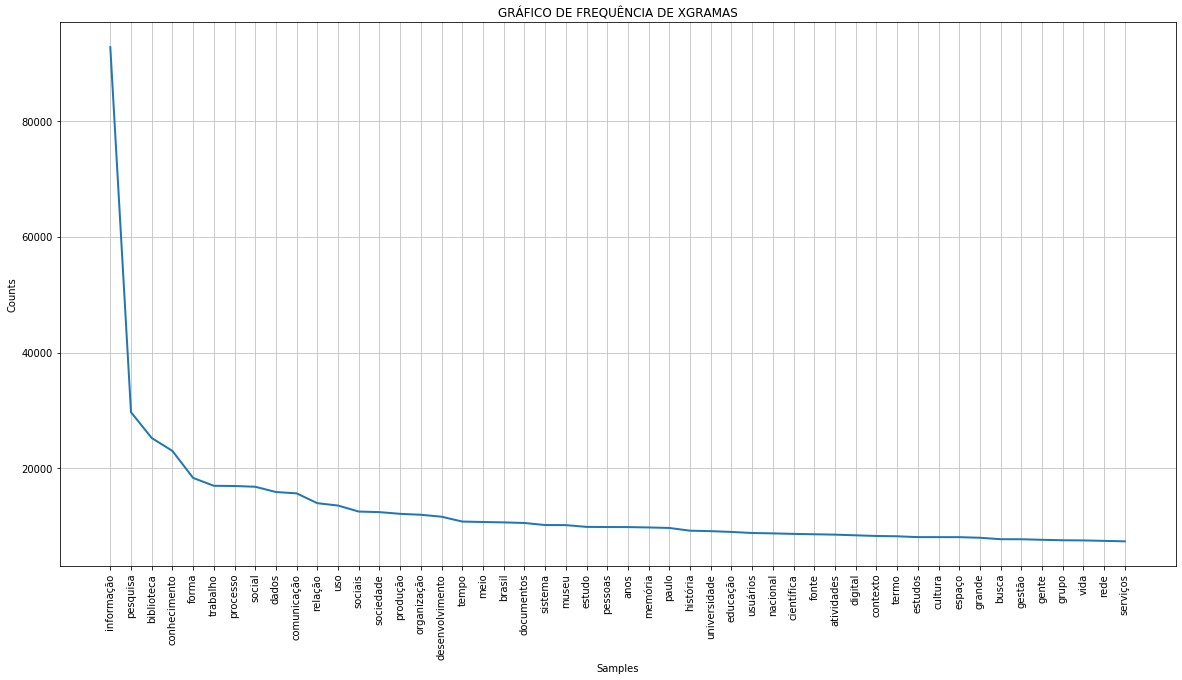

In [15]:
# MOSTRAR O GRÁFICO 

num_freq = 50
#fdist.figure(figsize=(30, 20))
arquivo_grafico = xfrequencia #mudar a variável para representações xgramas v1: total_unigramas v2: total_bigramas v3: total_trigramas v4: xfrequencia
fdist = FreqDist(arquivo_grafico)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
fdist.plot(num_freq,cumulative=False,title='GRÁFICO DE FREQUÊNCIA DE XGRAMAS')

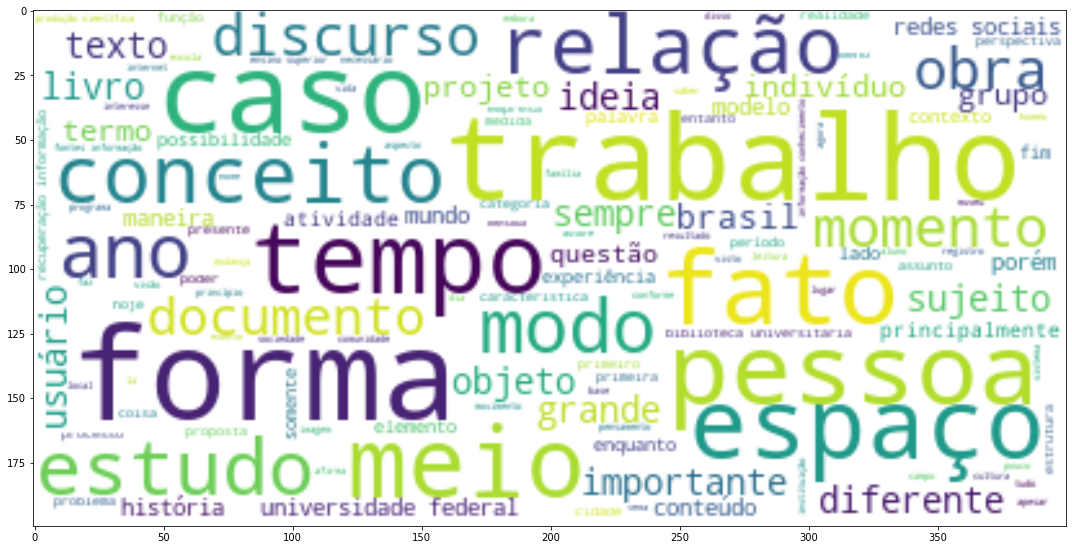

In [16]:
#NUVEM DE PALAVRAS

from wordcloud import WordCloud
cleaned =  ' '.join(xfrequencia)
num_freq = 250
wordcloud = WordCloud(max_font_size=50, max_words=num_freq, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()
plt.savefig("tesesdissertacoes_nuv_2012.png", format = "png")

# CRIANDO O DICIONÁRIO E O CORPUS

In [17]:
#CRIAR DICIONÁRIO 
dictionary = corpora.Dictionary(tokenized_data)
 
#TRANSFORMAR A COLEÇÃO TEXTO COM ID
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

## Latent Dirichlet Allocation (LDA)

### Modelo LDA - 10 tópicos

In [18]:
print("=========================================== Modelo LDA: 10 TÓPICOS ==================================================\n")
num_topics = 10

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 10 TÓPICOS ==================================================

Wall time: 24min 13s
Tópico 0:  0.014*"informação" + 0.004*"pesquisa" + 0.004*"biblioteca" + 0.003*"conhecimento" + 0.002*"dados" + 0.002*"processo" + 0.002*"comunicação" + 0.002*"uso" + 0.002*"forma" + 0.002*"trabalho"
Tópico 1:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"trabalho" + 0.000*"forma" + 0.000*"memória" + 0.000*"gente" + 0.000*"processo" + 0.000*"meio" + 0.000*"relação" + 0.000*"pessoas"
Tópico 2:  0.000*"cuidados" + 0.000*"paliativos" + 0.000*"cuidados_paliativos" + 0.000*"digital_libraries" + 0.000*"digital_library" + 0.000*"dor" + 0.000*"evaluation" + 0.000*"retrieved" + 0.000*"inca" + 0.000*"oncologia"
Tópico 3:  0.002*"memória" + 0.002*"museu" + 0.002*"social" + 0.002*"forma" + 0.002*"história" + 0.002*"gente" + 0.001*"cultura" + 0.001*"relação" + 0.001*"trabalho" + 0.001*"anos"
Tópico 4:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"dados" + 0.

### Modelo LDA - 14 tópicos

In [19]:
print("=========================================== Modelo LDA: 14 TÓPICOS ==================================================\n")
num_topics = 14
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 14 TÓPICOS ==================================================

Wall time: 25min 23s
Tópico 0:  0.000*"organicidade" + 0.000*"preservação_organicidade" + 0.000*"organicidade_informação" + 0.000*"organicidade_informação_arquivística" + 0.000*"preservação_organicidade_informação" + 0.000*"informação_arquivística" + 0.000*"campo_arquivístico" + 0.000*"arquivo_institucional" + 0.000*"identificação_organicidade" + 0.000*"relação_orgânica"
Tópico 1:  0.001*"zero" + 0.001*"zero_hora" + 0.001*"neural" + 0.001*"ontologias" + 0.001*"artigos" + 0.001*"hora" + 0.001*"ontologia" + 0.000*"alinhamento" + 0.000*"tabela" + 0.000*"coutinho"
Tópico 2:  0.001*"maya" + 0.001*"capaz" + 0.001*"castro_maya" + 0.001*"dispositivos" + 0.000*"dispositivos_comunicação" + 0.000*"sepetiba" + 0.000*"hashtags" + 0.000*"homeopatia" + 0.000*"parques" + 0.000*"parque"
Tópico 3:  0.001*"digital" + 0.001*"cartas" + 0.001*"competência" + 0.001*"musical" + 0.001*"library

### Modelo LDA - 18 tópicos

In [20]:
print("=========================================== Modelo LDA: 18 TÓPICOS ==================================================\n")
num_topics = 18
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 18 TÓPICOS ==================================================

Wall time: 33min 18s
Tópico 0:  0.003*"museu" + 0.003*"social" + 0.002*"memória" + 0.002*"história" + 0.002*"trabalho" + 0.002*"forma" + 0.002*"relação" + 0.002*"cultura" + 0.002*"sociais" + 0.002*"espaço"
Tópico 1:  0.001*"neural" + 0.001*"artigos" + 0.001*"networks" + 0.001*"neural_networks" + 0.001*"network" + 0.001*"neural_network" + 0.000*"referências" + 0.000*"processo_referência" + 0.000*"rna" + 0.000*"categorização"
Tópico 2:  0.000*"ex-voto" + 0.000*"ex-votos" + 0.000*"aplicabilidade_categorização" + 0.000*"aristóteles_ex-voto" + 0.000*"aplicabilidade_categorização_aristóteles" + 0.000*"categorização_aristóteles" + 0.000*"quadro_aplicabilidade_categorização" + 0.000*"categorização_aristóteles_ex-voto" + 0.000*"quadro_aplicabilidade" + 0.000*"vivo_padre"
Tópico 3:  0.002*"portal" + 0.001*"alinhamento" + 0.001*"anual" + 0.000*"multinucleate" + 0.000*"sub-áreas" 

### Modelo LDA - 22 tópicos

In [21]:
print("=========================================== Modelo LDA: 22 TÓPICOS ==================================================\n")
num_topics = 22
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 22 TÓPICOS ==================================================

Wall time: 37min 28s
Tópico 0:  0.000*"informação" + 0.000*"museu" + 0.000*"biblioteca" + 0.000*"pesquisa" + 0.000*"forma" + 0.000*"sociais" + 0.000*"brasil" + 0.000*"social" + 0.000*"profissional" + 0.000*"conhecimento"
Tópico 1:  0.001*"poma" + 0.001*"guaman" + 0.001*"teste_gerado_versão" + 0.001*"gerado_versão" + 0.001*"arquivo_teste_gerado" + 0.001*"teste_gerado" + 0.001*"arquivo_teste" + 0.001*"guaman_poma" + 0.001*"versão" + 0.001*"gerado"
Tópico 2:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"forma" + 0.000*"minissérie" + 0.000*"trabalho" + 0.000*"leitor" + 0.000*"conhecimento" + 0.000*"juscelino" + 0.000*"processo" + 0.000*"anos"
Tópico 3:  0.003*"informação" + 0.002*"social" + 0.002*"memória" + 0.002*"forma" + 0.002*"trabalho" + 0.002*"museu" + 0.002*"história" + 0.002*"relação" + 0.002*"pesquisa" + 0.002*"tempo"
Tópico 4:  0.000*"informação" + 0.000*"forma

### Modelo LDA - 26 tópicos

In [22]:
print("=========================================== Modelo LDA: 26 TÓPICOS ==================================================\n")
num_topics = 26
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 26 TÓPICOS ==================================================

Wall time: 48min 20s
Tópico 0:  0.001*"gonçalo" + 0.000*"palmier" + 0.000*"gonçalense" + 0.000*"município_gonçalo" + 0.000*"gonçalenses" + 0.000*"empreendedores_memória" + 0.000*"cidade_gonçalo" + 0.000*"gonçalo_história" + 0.000*"luiz_palmier" + 0.000*"história_gonçalo"
Tópico 1:  0.002*"segurança" + 0.001*"segurança_informação" + 0.001*"políticas_instituição" + 0.001*"wikileaks" + 0.000*"instituição_pesquisada" + 0.000*"pesquisada" + 0.000*"políticas_instituição_pesquisada" + 0.000*"assange" + 0.000*"critério" + 0.000*"segurança_informacional"
Tópico 2:  0.015*"biblioteca" + 0.003*"escolar" + 0.002*"biblioteca_escolar" + 0.001*"dispositivos" + 0.001*"leitura" + 0.001*"biblioteca_universitárias" + 0.001*"biblioteca_universitária" + 0.001*"universitária" + 0.001*"universitárias" + 0.001*"escola"
Tópico 3:  0.018*"informação" + 0.005*"pesquisa" + 0.004*"conhecimento" + 

### Modelo LDA - 30 tópicos

In [23]:
print("=========================================== Modelo LDA: 30 TÓPICOS ==================================================\n")
num_topics = 30

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 30 TÓPICOS ==================================================

Wall time: 42min 43s
Tópico 0:  0.002*"segurança" + 0.002*"segurança_informação" + 0.001*"políticas_instituição" + 0.001*"instituição_pesquisada" + 0.000*"mayara" + 0.000*"pesquisada" + 0.000*"políticas_instituição_pesquisada" + 0.000*"critério" + 0.000*"petruso" + 0.000*"mayara_petruso"
Tópico 1:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"conhecimento" + 0.000*"biblioteca" + 0.000*"processo" + 0.000*"trabalho" + 0.000*"dados" + 0.000*"forma" + 0.000*"uso" + 0.000*"profissional"
Tópico 2:  0.002*"docentes" + 0.002*"repositórios" + 0.001*"produção_científica" + 0.001*"repositórios_institucionais" + 0.001*"repositório" + 0.001*"qualis" + 0.001*"científica" + 0.001*"coletâneas" + 0.001*"chile" + 0.001*"teses"
Tópico 3:  0.002*"recife" + 0.001*"pernambuco" + 0.001*"monumentos" + 0.001*"anníbal" + 0.001*"inspetoria" + 0.000*"pernambuco_recife" + 0.000*"província" + 0.0

### Modelo LDA - 34 tópicos

In [24]:
print("=========================================== Modelo LDA: 34 TÓPICOS ==================================================\n")
num_topics = 34

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 34 TÓPICOS ==================================================

Wall time: 57min 9s
Tópico 0:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"biblioteca" + 0.000*"digital" + 0.000*"uso" + 0.000*"linguagem" + 0.000*"usuários" + 0.000*"conhecimento" + 0.000*"sistema" + 0.000*"dados"
Tópico 1:  0.000*"dengue" + 0.000*"pesquisa_dengue" + 0.000*"utilização_resultados" + 0.000*"induzida" + 0.000*"contribuíram_impacto" + 0.000*"aperfeiçoamento_produtos" + 0.000*"produtivo_privado" + 0.000*"independência_respostas" + 0.000*"mct/cnpq/ms-sctie-decit" + 0.000*"setor_produtivo_privado"
Tópico 2:  0.001*"oral" + 0.001*"sepetiba" + 0.001*"caninha" + 0.001*"caninha_verde" + 0.001*"história_oral" + 0.001*"vassouras" + 0.001*"kindle" + 0.001*"e-books" + 0.001*"guarani" + 0.001*"kindle_iii"
Tópico 3:  0.000*"informação" + 0.000*"trabalho" + 0.000*"pesquisa" + 0.000*"arte" + 0.000*"conhecimento" + 0.000*"comunidade" + 0.000*"paliativos" + 0.000*"soci

### Modelo LDA - 38 tópicos

In [25]:
print("=========================================== Modelo LDA: 38 TÓPICOS ==================================================\n")
num_topics = 38

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 38 TÓPICOS ==================================================

Wall time: 57min 51s
Tópico 0:  0.001*"olympio" + 0.001*"josé_olympio" + 0.000*"livraria_josé_olympio" + 0.000*"livraria_josé" + 0.000*"josé_olympio_editora" + 0.000*"olympio_editora" + 0.000*"livraria" + 0.000*"livraria-editora" + 0.000*"editor_josé_olympio" + 0.000*"editor_josé"
Tópico 1:  0.002*"san" + 0.001*"agustín" + 0.001*"san_agustín" + 0.001*"susan" + 0.000*"agustin" + 0.000*"san_agustin" + 0.000*"kelly" + 0.000*"crianças_jovens" + 0.000*"vega" + 0.000*"fotógrafos"
Tópico 2:  0.001*"diretoria" + 0.001*"assembléia" + 0.001*"coordenadoria" + 0.001*"legislativa" + 0.001*"assembléia_legislativa" + 0.001*"semantic" + 0.001*"semantic_informação" + 0.001*"mama" + 0.001*"diretoria_comunicação" + 0.001*"diretoria_tecnologia"
Tópico 3:  0.001*"mineração" + 0.001*"mineração_dados" + 0.001*"ontologias" + 0.001*"difusa" + 0.001*"mbe" + 0.001*"fuzzy" + 0.001*"vaguidade" + 0

Tópico 37:  0.001*"gabinete" + 0.001*"municipal" + 0.001*"prefeito" + 0.001*"prefeitura" + 0.001*"proveniência" + 0.001*"gabinete_prefeito" + 0.001*"prefeitura_municipal" + 0.001*"princípio_proveniência" + 0.001*"princípio" + 0.000*"arquivística"


### Modelo LDA - 42 tópicos

In [26]:
print("=========================================== Modelo LDA: 42 TÓPICOS ==================================================\n")
num_topics = 42

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))




=========================================== Modelo LDA: 42 TÓPICOS ==================================================

Wall time: 1h 15min 47s
Tópico 0:  0.000*"informação" + 0.000*"social" + 0.000*"memória" + 0.000*"conhecimento" + 0.000*"centro_cultural" + 0.000*"pesquisa" + 0.000*"ccbj" + 0.000*"processo" + 0.000*"bom_jardim" + 0.000*"comunidade"
Tópico 1:  0.000*"informação" + 0.000*"biblioteca" + 0.000*"conhecimento" + 0.000*"pesquisa" + 0.000*"trabalho" + 0.000*"relação" + 0.000*"social" + 0.000*"digital" + 0.000*"forma" + 0.000*"construção"
Tópico 2:  0.000*"informação" + 0.000*"arquivo" + 0.000*"dados" + 0.000*"forma" + 0.000*"pesquisa" + 0.000*"social" + 0.000*"tempo" + 0.000*"documentos" + 0.000*"serviços" + 0.000*"memória"
Tópico 3:  0.000*"informação" + 0.000*"web" + 0.000*"pesquisa" + 0.000*"forma" + 0.000*"anos" + 0.000*"conhecimento" + 0.000*"memória" + 0.000*"social" + 0.000*"relação" + 0.000*"história"
Tópico 4:  0.000*"informação" + 0.000*"dados" + 0.000*"uso" + 0.000

Tópico 38:  0.000*"informação" + 0.000*"conhecimento" + 0.000*"forma" + 0.000*"pesquisa" + 0.000*"processo" + 0.000*"dados" + 0.000*"paulo" + 0.000*"sociais" + 0.000*"trabalho" + 0.000*"brasil"
Tópico 39:  0.000*"pajelança" + 0.000*"marajó" + 0.000*"cachoeira" + 0.000*"informação" + 0.000*"gallo" + 0.000*"arari" + 0.000*"marajoara" + 0.000*"caruana" + 0.000*"marajó_giovanni" + 0.000*"pajé"
Tópico 40:  0.002*"gonçalo" + 0.001*"chile" + 0.001*"palmier" + 0.000*"tradução_livre" + 0.000*"gonçalense" + 0.000*"escena" + 0.000*"arte_chile" + 0.000*"chilena" + 0.000*"cuerpo" + 0.000*"avanzada"
Tópico 41:  0.003*"capaz" + 0.002*"conhecer" + 0.001*"competências" + 0.000*"conhecer_teorias" + 0.000*"informação_capaz" + 0.000*"região_florianópolis" + 0.000*"gap" + 0.000*"universidades_região" + 0.000*"informação_conhecer" + 0.000*"conhecer_teorias_gestão"


## Imprimir o melhor resultado - LDA

In [ ]:
#IMPRESSÃO DO MELHOR RESULTADO
print("=========================================== Modelo LDA: 12 TÓPICOS ==================================================\n")
num_topics = 12 

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

### PyLDAvis

Criando a visulização dos tópicos do modelo LDA.

In [ ]:
#IMPORTAR BIBLIOTECA PARA VISUALIZAÇÃO DOS TÓPICOS LDA
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#VISUALIZAR NO GRÁFICO PYLDAVIS
pyLDAvis.enable_notebook()
%time vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_tesesdissertacoes_.html')
vis

## Latent Semantic Indexing (LSI)


### Modelo LSI - 10 tópicos

In [27]:
print("=========================================== Modelo LSI: 10 TÓPICOS ==================================================\n")

NUM_TOPICS = 10
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 10 TÓPICOS ==================================================

Wall time: 5min 45s
Tópico #0:  0.668*"informação" + 0.195*"pesquisa" + 0.191*"biblioteca" + 0.151*"conhecimento" + 0.100*"comunicação" + 0.099*"dados" + 0.097*"processo" + 0.097*"forma" + 0.096*"trabalho" + 0.093*"social"
Tópico #1:  -0.554*"informação" + 0.474*"biblioteca" + 0.158*"gente" + 0.132*"museu" + 0.103*"social" + 0.097*"espaço" + 0.092*"educação" + 0.088*"memória" + 0.086*"trabalho" + 0.083*"história"
Tópico #2:  -0.648*"biblioteca" + 0.183*"museu" + -0.144*"usuários" + 0.137*"memória" + 0.114*"história" + -0.110*"informação" + 0.090*"forma" + 0.090*"trabalho" + 0.082*"cultura" + 0.075*"produção"
Tópico #3:  -0.276*"gente" + -0.228*"informação" + 0.221*"pesquisa" + 0.210*"científica" + 0.193*"documentos" + 0.162*"museu" + -0.141*"zero" + 0.139*"produção" + 0.134*"conhecimento" + -0.124*"hora"
Tópico #4:  -0.444*"museu" + 0.235*"zero" + -0.199*"informação" +

### Modelo LSI - 14 tópicos

In [28]:
print("=========================================== Modelo LSI: 14 TÓPICOS ==================================================\n")

NUM_TOPICS = 14
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 14 TÓPICOS ==================================================

Wall time: 6min 7s
Tópico #0:  0.668*"informação" + 0.195*"pesquisa" + 0.191*"biblioteca" + 0.151*"conhecimento" + 0.100*"comunicação" + 0.099*"dados" + 0.097*"processo" + 0.097*"forma" + 0.096*"trabalho" + 0.093*"social"
Tópico #1:  0.554*"informação" + -0.474*"biblioteca" + -0.158*"gente" + -0.132*"museu" + -0.103*"social" + -0.097*"espaço" + -0.092*"educação" + -0.088*"memória" + -0.086*"trabalho" + -0.083*"história"
Tópico #2:  0.648*"biblioteca" + -0.183*"museu" + 0.144*"usuários" + -0.137*"memória" + -0.114*"história" + 0.110*"informação" + -0.090*"forma" + -0.090*"trabalho" + -0.082*"cultura" + -0.075*"produção"
Tópico #3:  0.276*"gente" + 0.228*"informação" + -0.221*"pesquisa" + -0.210*"científica" + -0.193*"documentos" + -0.162*"museu" + 0.141*"zero" + -0.139*"produção" + -0.134*"conhecimento" + 0.124*"hora"
Tópico #4:  0.444*"museu" + -0.235*"zero" + 0.199*"i

### Modelo LSI - 18 tópicos

In [29]:
print("=========================================== Modelo LSI: 18 TÓPICOS ==================================================\n")

NUM_TOPICS = 18
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 18 TÓPICOS ==================================================

Wall time: 6min 21s
Tópico #0:  0.668*"informação" + 0.195*"pesquisa" + 0.191*"biblioteca" + 0.151*"conhecimento" + 0.100*"comunicação" + 0.099*"dados" + 0.097*"processo" + 0.097*"forma" + 0.096*"trabalho" + 0.093*"social"
Tópico #1:  -0.554*"informação" + 0.474*"biblioteca" + 0.158*"gente" + 0.132*"museu" + 0.103*"social" + 0.097*"espaço" + 0.092*"educação" + 0.088*"memória" + 0.086*"trabalho" + 0.083*"história"
Tópico #2:  -0.648*"biblioteca" + 0.183*"museu" + -0.144*"usuários" + 0.137*"memória" + 0.114*"história" + -0.110*"informação" + 0.090*"forma" + 0.090*"trabalho" + 0.082*"cultura" + 0.075*"produção"
Tópico #3:  0.276*"gente" + 0.228*"informação" + -0.221*"pesquisa" + -0.210*"científica" + -0.193*"documentos" + -0.162*"museu" + 0.141*"zero" + -0.139*"produção" + -0.134*"conhecimento" + 0.124*"hora"
Tópico #4:  -0.444*"museu" + 0.235*"zero" + -0.199*"informação"

### Modelo LSI - 22 tópicos

In [30]:
print("=========================================== Modelo LSI: 22 TÓPICOS ==================================================\n")

NUM_TOPICS = 22
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 22 TÓPICOS ==================================================

Wall time: 7min 5s
Tópico #0:  0.668*"informação" + 0.195*"pesquisa" + 0.191*"biblioteca" + 0.151*"conhecimento" + 0.100*"comunicação" + 0.099*"dados" + 0.097*"processo" + 0.097*"forma" + 0.096*"trabalho" + 0.093*"social"
Tópico #1:  0.554*"informação" + -0.474*"biblioteca" + -0.158*"gente" + -0.132*"museu" + -0.103*"social" + -0.097*"espaço" + -0.092*"educação" + -0.088*"memória" + -0.086*"trabalho" + -0.083*"história"
Tópico #2:  0.648*"biblioteca" + -0.183*"museu" + 0.144*"usuários" + -0.137*"memória" + -0.114*"história" + 0.110*"informação" + -0.090*"forma" + -0.090*"trabalho" + -0.082*"cultura" + -0.075*"produção"
Tópico #3:  0.276*"gente" + 0.228*"informação" + -0.221*"pesquisa" + -0.210*"científica" + -0.193*"documentos" + -0.162*"museu" + 0.141*"zero" + -0.139*"produção" + -0.134*"conhecimento" + 0.124*"hora"
Tópico #4:  -0.444*"museu" + 0.235*"zero" + -0.199*"

### Modelo LSI - 26 tópicos

In [31]:
print("=========================================== Modelo LSI: 26 TÓPICOS ==================================================\n")

NUM_TOPICS = 26
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 26 TÓPICOS ==================================================

Wall time: 7min 35s
Tópico #0:  0.668*"informação" + 0.195*"pesquisa" + 0.191*"biblioteca" + 0.151*"conhecimento" + 0.100*"comunicação" + 0.099*"dados" + 0.097*"processo" + 0.097*"forma" + 0.096*"trabalho" + 0.093*"social"
Tópico #1:  0.554*"informação" + -0.474*"biblioteca" + -0.158*"gente" + -0.132*"museu" + -0.103*"social" + -0.097*"espaço" + -0.092*"educação" + -0.088*"memória" + -0.086*"trabalho" + -0.083*"história"
Tópico #2:  -0.648*"biblioteca" + 0.183*"museu" + -0.144*"usuários" + 0.137*"memória" + 0.114*"história" + -0.110*"informação" + 0.090*"forma" + 0.090*"trabalho" + 0.082*"cultura" + 0.075*"produção"
Tópico #3:  -0.276*"gente" + -0.228*"informação" + 0.221*"pesquisa" + 0.210*"científica" + 0.193*"documentos" + 0.162*"museu" + -0.141*"zero" + 0.139*"produção" + 0.134*"conhecimento" + -0.124*"hora"
Tópico #4:  -0.444*"museu" + 0.235*"zero" + -0.199*"infor

### Modelo LSI - 30 tópicos

In [32]:
print("=========================================== Modelo LSI: 30 TÓPICOS ==================================================\n")

NUM_TOPICS = 30
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 30 TÓPICOS ==================================================

Wall time: 7min 51s
Tópico #0:  0.668*"informação" + 0.195*"pesquisa" + 0.191*"biblioteca" + 0.151*"conhecimento" + 0.100*"comunicação" + 0.099*"dados" + 0.097*"processo" + 0.097*"forma" + 0.096*"trabalho" + 0.093*"social"
Tópico #1:  0.554*"informação" + -0.474*"biblioteca" + -0.158*"gente" + -0.132*"museu" + -0.103*"social" + -0.097*"espaço" + -0.092*"educação" + -0.088*"memória" + -0.086*"trabalho" + -0.083*"história"
Tópico #2:  0.648*"biblioteca" + -0.183*"museu" + 0.144*"usuários" + -0.137*"memória" + -0.114*"história" + 0.110*"informação" + -0.090*"forma" + -0.090*"trabalho" + -0.082*"cultura" + -0.075*"produção"
Tópico #3:  0.276*"gente" + 0.228*"informação" + -0.221*"pesquisa" + -0.210*"científica" + -0.193*"documentos" + -0.162*"museu" + 0.141*"zero" + -0.139*"produção" + -0.134*"conhecimento" + 0.124*"hora"
Tópico #4:  -0.444*"museu" + 0.235*"zero" + -0.199*

### Modelo LSI - 34 tópicos

In [33]:
print("=========================================== Modelo LSI: 34 TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 34 TÓPICOS ==================================================

Wall time: 8min 29s
Tópico #0:  0.668*"informação" + 0.195*"pesquisa" + 0.191*"biblioteca" + 0.151*"conhecimento" + 0.100*"comunicação" + 0.099*"dados" + 0.097*"processo" + 0.097*"forma" + 0.096*"trabalho" + 0.093*"social"
Tópico #1:  0.554*"informação" + -0.474*"biblioteca" + -0.158*"gente" + -0.132*"museu" + -0.103*"social" + -0.097*"espaço" + -0.092*"educação" + -0.088*"memória" + -0.086*"trabalho" + -0.083*"história"
Tópico #2:  -0.648*"biblioteca" + 0.183*"museu" + -0.144*"usuários" + 0.137*"memória" + 0.114*"história" + -0.110*"informação" + 0.090*"forma" + 0.090*"trabalho" + 0.082*"cultura" + 0.075*"produção"
Tópico #3:  -0.276*"gente" + -0.228*"informação" + 0.221*"pesquisa" + 0.210*"científica" + 0.193*"documentos" + 0.162*"museu" + -0.141*"zero" + 0.139*"produção" + 0.134*"conhecimento" + -0.124*"hora"
Tópico #4:  -0.444*"museu" + 0.235*"zero" + -0.199*"infor

### Modelo LSI - 38 tópicos

In [34]:
print("=========================================== Modelo LSI: 38 TÓPICOS ==================================================\n")

NUM_TOPICS = 38
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 38 TÓPICOS ==================================================

Wall time: 9min 29s
Tópico #0:  0.668*"informação" + 0.195*"pesquisa" + 0.191*"biblioteca" + 0.151*"conhecimento" + 0.100*"comunicação" + 0.099*"dados" + 0.097*"processo" + 0.097*"forma" + 0.096*"trabalho" + 0.093*"social"
Tópico #1:  -0.554*"informação" + 0.474*"biblioteca" + 0.158*"gente" + 0.132*"museu" + 0.103*"social" + 0.097*"espaço" + 0.092*"educação" + 0.088*"memória" + 0.086*"trabalho" + 0.083*"história"
Tópico #2:  -0.648*"biblioteca" + 0.183*"museu" + -0.144*"usuários" + 0.137*"memória" + 0.114*"história" + -0.110*"informação" + 0.090*"forma" + 0.090*"trabalho" + 0.082*"cultura" + 0.075*"produção"
Tópico #3:  -0.276*"gente" + -0.228*"informação" + 0.221*"pesquisa" + 0.210*"científica" + 0.193*"documentos" + 0.162*"museu" + -0.141*"zero" + 0.139*"produção" + 0.134*"conhecimento" + -0.124*"hora"
Tópico #4:  -0.444*"museu" + 0.235*"zero" + -0.199*"informação" +

### Modelo LSI - 42 tópicos

In [35]:
print("=========================================== Modelo LSI: 42 TÓPICOS ==================================================\n")

NUM_TOPICS = 42
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 42 TÓPICOS ==================================================

Wall time: 10min 30s
Tópico #0:  0.668*"informação" + 0.195*"pesquisa" + 0.191*"biblioteca" + 0.151*"conhecimento" + 0.100*"comunicação" + 0.099*"dados" + 0.097*"processo" + 0.097*"forma" + 0.096*"trabalho" + 0.093*"social"
Tópico #1:  0.554*"informação" + -0.474*"biblioteca" + -0.158*"gente" + -0.132*"museu" + -0.103*"social" + -0.097*"espaço" + -0.092*"educação" + -0.088*"memória" + -0.086*"trabalho" + -0.083*"história"
Tópico #2:  0.648*"biblioteca" + -0.183*"museu" + 0.144*"usuários" + -0.137*"memória" + -0.114*"história" + 0.110*"informação" + -0.090*"forma" + -0.090*"trabalho" + -0.082*"cultura" + -0.075*"produção"
Tópico #3:  -0.276*"gente" + -0.228*"informação" + 0.221*"pesquisa" + 0.210*"científica" + 0.193*"documentos" + 0.162*"museu" + -0.141*"zero" + 0.139*"produção" + 0.134*"conhecimento" + -0.124*"hora"
Tópico #4:  -0.444*"museu" + 0.235*"zero" + -0.199*"

Tópico #40:  0.183*"organização" + -0.152*"arquivo" + 0.145*"curso" + -0.129*"indexação" + 0.126*"leitura" + -0.121*"governo" + -0.118*"assunto" + -0.117*"dados" + -0.102*"trabalho" + 0.097*"grupo"
Tópico #41:  -0.219*"caderno" + -0.213*"cultura" + 0.209*"patrimônio" + -0.135*"governo" + 0.124*"nacional" + -0.118*"rede" + 0.112*"sociais" + -0.111*"mediação" + 0.110*"segurança" + -0.105*"comunidade"


## Imprimir o melhor resultado - LSI

In [ ]:
#MELHOR LSI
print("=========================================== Modelo LSI: XX TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))